In [1]:
import nltk
import pandas as pd
import numpy as np

def sort_by_sentiment(x):
    if 7<=x<=10:
        return "positive"
    elif 5<=x<=6:
        return "neutral"
    else:
        return "negative"
df = pd.read_csv("imdb_enola_holmes_reviews.csv")

df["sentiment_labels"] = df["rating"].apply(sort_by_sentiment)
# df.to_csv("imdb_enola_holmes_reviews_sentiment_labels.csv",index=False)


print(df.head())
print(df.dtypes)
print(df.shape)

          user_name                                       review_title  \
0  jesamazinghawley                        "Perfect for a 15 yro girl"   
1     faolanredwolf  "Not for Sherlock Holmes fans, but not bad eit...   
2           korpake               "It could have been so much more..."   
3      zekehardrock           "Am I the only man who love this movie?"   
4        robertnees  "Jiu-Jitsu in the early 1900s, Yes, females an...   

         review_date                                        review_text  \
0  25 September 2020  "This is the movie I wish I had at 15. This is...   
1  24 September 2020  "Enola Holmes is absolutely wonderful, quirky ...   
2  23 September 2020  "Interesting premise, interesting setting, goo...   
3  23 September 2020  "Mille Bobby Brown is excellent, Sam Claflin i...   
4  24 September 2020  "For the other reviewers that stated things li...   

   rating sentiment_labels  
0       8         positive  
1       6          neutral  
2       5        

In [2]:
# combine titles and review text
df["review_combined"] = df["review_title"] + df["review_text"]
df["review_combined"]=df["review_combined"].apply(lambda x: x.replace('"', ' '))
df["review_combined"]
print(df.head())

          user_name                                       review_title  \
0  jesamazinghawley                        "Perfect for a 15 yro girl"   
1     faolanredwolf  "Not for Sherlock Holmes fans, but not bad eit...   
2           korpake               "It could have been so much more..."   
3      zekehardrock           "Am I the only man who love this movie?"   
4        robertnees  "Jiu-Jitsu in the early 1900s, Yes, females an...   

         review_date                                        review_text  \
0  25 September 2020  "This is the movie I wish I had at 15. This is...   
1  24 September 2020  "Enola Holmes is absolutely wonderful, quirky ...   
2  23 September 2020  "Interesting premise, interesting setting, goo...   
3  23 September 2020  "Mille Bobby Brown is excellent, Sam Claflin i...   
4  24 September 2020  "For the other reviewers that stated things li...   

   rating sentiment_labels                                    review_combined  
0       8         positi

In [3]:
# tokenize
df["review_tokenized"] = df["review_combined"].apply(lambda x:nltk.word_tokenize(x))
print(df.head())

          user_name                                       review_title  \
0  jesamazinghawley                        "Perfect for a 15 yro girl"   
1     faolanredwolf  "Not for Sherlock Holmes fans, but not bad eit...   
2           korpake               "It could have been so much more..."   
3      zekehardrock           "Am I the only man who love this movie?"   
4        robertnees  "Jiu-Jitsu in the early 1900s, Yes, females an...   

         review_date                                        review_text  \
0  25 September 2020  "This is the movie I wish I had at 15. This is...   
1  24 September 2020  "Enola Holmes is absolutely wonderful, quirky ...   
2  23 September 2020  "Interesting premise, interesting setting, goo...   
3  23 September 2020  "Mille Bobby Brown is excellent, Sam Claflin i...   
4  24 September 2020  "For the other reviewers that stated things li...   

   rating sentiment_labels                                    review_combined  \
0       8         posit

In [4]:
# convert to lower case
df["review_tokenized"] = df["review_tokenized"].apply(lambda x : [w.lower() for w in x])
df["review_tokenized"]

0       [perfect, for, a, 15, yro, girl, this, is, the...
1       [not, for, sherlock, holmes, fans, ,, but, not...
2       [it, could, have, been, so, much, more, ..., i...
3       [am, i, the, only, man, who, love, this, movie...
4       [jiu-jitsu, in, the, early, 1900s, ,, yes, ,, ...
                              ...                        
1241    [disjointed, ,, but, with, great, potential, t...
1242    [good, not, great, ., millie, bobby, brown, wa...
1243    [a, new, approach, to, our, favorite, characte...
1244    [well, played, it, always, pleases, me, to, wa...
1245    [anne, of, green, gable, redux, ignore, both, ...
Name: review_tokenized, Length: 1246, dtype: object

In [5]:
# remove punctuation
import string
df["review_tokenized"] = df["review_tokenized"].apply(lambda x : [w for w in x if w not in string.punctuation])
df["review_tokenized"]

0       [perfect, for, a, 15, yro, girl, this, is, the...
1       [not, for, sherlock, holmes, fans, but, not, b...
2       [it, could, have, been, so, much, more, ..., i...
3       [am, i, the, only, man, who, love, this, movie...
4       [jiu-jitsu, in, the, early, 1900s, yes, female...
                              ...                        
1241    [disjointed, but, with, great, potential, the,...
1242    [good, not, great, millie, bobby, brown, was, ...
1243    [a, new, approach, to, our, favorite, characte...
1244    [well, played, it, always, pleases, me, to, wa...
1245    [anne, of, green, gable, redux, ignore, both, ...
Name: review_tokenized, Length: 1246, dtype: object

In [6]:
# remove remaining tokens that are not alphabetic or digits
df["review_tokenized"] = df["review_tokenized"].apply(lambda x : [w for w in x if w.isalpha() or w.isdigit()])
df["review_tokenized"]

0       [perfect, for, a, 15, yro, girl, this, is, the...
1       [not, for, sherlock, holmes, fans, but, not, b...
2       [it, could, have, been, so, much, more, intere...
3       [am, i, the, only, man, who, love, this, movie...
4       [in, the, early, yes, females, and, children, ...
                              ...                        
1241    [disjointed, but, with, great, potential, the,...
1242    [good, not, great, millie, bobby, brown, was, ...
1243    [a, new, approach, to, our, favorite, characte...
1244    [well, played, it, always, pleases, me, to, wa...
1245    [anne, of, green, gable, redux, ignore, both, ...
Name: review_tokenized, Length: 1246, dtype: object

In [7]:
# filter out stop words
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
df["review_tokenized"] = df["review_tokenized"].apply(lambda x : [w for w in x if w not in stop_words])
df["review_tokenized"]

0       [perfect, 15, yro, girl, movie, wish, 15, sher...
1       [sherlock, holmes, fans, bad, either, enola, h...
2       [could, much, interesting, premise, interestin...
3       [man, love, movie, mille, bobby, brown, excell...
4       [early, yes, females, children, taught, review...
                              ...                        
1241    [disjointed, great, potential, biggest, proble...
1242    [good, great, millie, bobby, brown, amazing, c...
1243    [new, approach, favorite, characters, know, mo...
1244    [well, played, always, pleases, watch, well, w...
1245    [anne, green, gable, redux, ignore, high, low,...
Name: review_tokenized, Length: 1246, dtype: object

In [11]:
positive_reviews = df["review_tokenized"].loc[df['sentiment_labels'] == "positive"]
negative_reviews = df["review_tokenized"].loc[df['sentiment_labels'] == "negative"]
def join_series(series):
    total_review_tokens=[]
    for l in series.values:
        total_review_tokens+=l
    return total_review_tokens

# get positive and negative words

positive_review_tokens = join_series(positive_reviews)
negative_review_tokens = join_series(negative_reviews)
positive_words =" ".join(positive_review_tokens)
negative_words =" ".join(negative_review_tokens)

In [12]:
from nltk import FreqDist
def get_most_common_words(total_review_tokens): 
    freq_dist_pos = FreqDist(total_review_tokens)
    print(freq_dist_pos.most_common(20))
    
# show most common words    

positive_common_words = get_most_common_words(positive_review_tokens)
negative_common_words = get_most_common_words(negative_review_tokens)

[('movie', 1035), ('holmes', 546), ('sherlock', 467), ('enola', 461), ('film', 385), ('good', 377), ('great', 362), ('fun', 322), ('millie', 306), ('brown', 287), ('story', 278), ('watch', 244), ('like', 243), ('bobby', 228), ('would', 218), ('really', 214), ('well', 211), ('one', 194), ('much', 163), ('character', 160)]
[('movie', 385), ('sherlock', 189), ('holmes', 166), ('enola', 155), ('like', 137), ('film', 113), ('story', 96), ('good', 95), ('could', 90), ('would', 82), ('time', 80), ('bad', 77), ('character', 75), ('even', 73), ('boring', 71), ('really', 67), ('one', 66), ('characters', 62), ('women', 60), ('plot', 57)]


In [ ]:
# show wordcloud

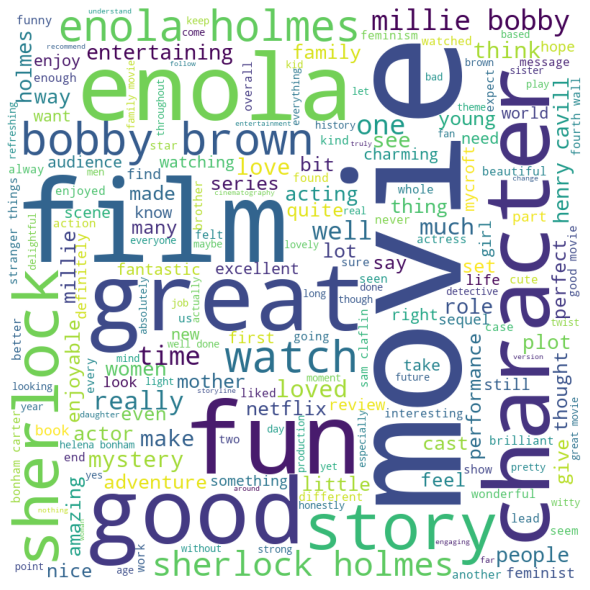

In [13]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 


wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(positive_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

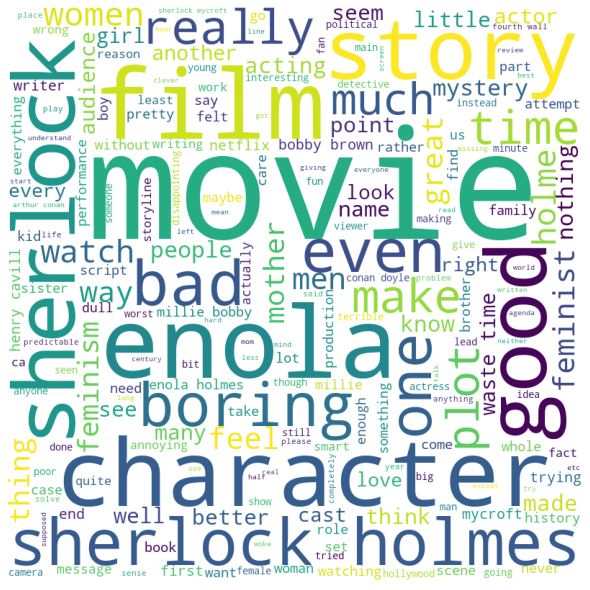

In [14]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(negative_words)
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [15]:
df["sentiment_labels"].value_counts() # class imbalance


positive    733
negative    264
neutral     249
Name: sentiment_labels, dtype: int64

In [16]:
df.head()

,user_name,review_title,review_date,review_text,rating,sentiment_labels,review_combined,review_tokenized
0,jesamazinghawley,"""Perfect for a 15 yro girl""",25 September 2020,"""This is the movie I wish I had at 15. This is...",8,positive,Perfect for a 15 yro girl This is the movie ...,"[perfect, 15, yro, girl, movie, wish, 15, sher..."
1,faolanredwolf,"""Not for Sherlock Holmes fans, but not bad eit...",24 September 2020,"""Enola Holmes is absolutely wonderful, quirky ...",6,neutral,"Not for Sherlock Holmes fans, but not bad eit...","[sherlock, holmes, fans, bad, either, enola, h..."
2,korpake,"""It could have been so much more...""",23 September 2020,"""Interesting premise, interesting setting, goo...",5,neutral,It could have been so much more... Interesti...,"[could, much, interesting, premise, interestin..."
3,zekehardrock,"""Am I the only man who love this movie?""",23 September 2020,"""Mille Bobby Brown is excellent, Sam Claflin i...",9,positive,Am I the only man who love this movie? Mille...,"[man, love, movie, mille, bobby, brown, excell..."
4,robertnees,"""Jiu-Jitsu in the early 1900s, Yes, females an...",24 September 2020,"""For the other reviewers that stated things li...",6,neutral,"Jiu-Jitsu in the early 1900s, Yes, females an...","[early, yes, females, children, taught, review..."


In [17]:
# vectorize and get features and labels
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
my_stop_words = text.ENGLISH_STOP_WORDS.union('millie bobbie brown sir arthur conan doyle henry cavill'.split())

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 3), stop_words=my_stop_words)
features = tfidf.fit_transform(df["review_combined"]).toarray()
labels = df["sentiment_labels"]
features.shape
tfidf.get_stop_words()
tfidf.get_feature_names()


['10',
 '10 10',
 '100',
 '11',
 '12',
 '12 year',
 '13',
 '15',
 '15 minutes',
 '16',
 '16 year',
 '16 year old',
 '16 years',
 '16 years old',
 '16th',
 '16th birthday',
 '1800s',
 '1880',
 '1884',
 '1900s',
 '19th',
 '19th century',
 '20',
 '2020',
 '21st',
 '21st century',
 '30',
 '30 minutes',
 '4th',
 '4th wall',
 '4th wall breaking',
 '4th wall breaks',
 '90',
 'ability',
 'able',
 'absolute',
 'absolute delight',
 'absolutely',
 'absolutely loved',
 'absolutely wonderful',
 'accent',
 'accept',
 'acceptable',
 'accuracy',
 'accurate',
 'achieve',
 'acknowledge',
 'act',
 'acted',
 'acting',
 'acting bad',
 'acting bobby',
 'acting characters',
 'acting good',
 'acting great',
 'acting movie',
 'acting really',
 'acting skills',
 'acting superb',
 'action',
 'action packed',
 'action scenes',
 'action sequences',
 'actions',
 'actor',
 'actors',
 'actress',
 'actresses',
 'acts',
 'actual',
 'actually',
 'adaptation',
 'adaptations',
 'adapted',
 'add',
 'added',
 'adding',
 'ad

In [18]:
# for data exploration get most corretated ngrams
from sklearn.feature_selection import chi2
N = 3
for sentiment in sorted(df["sentiment_labels"].unique()):
    features_chi2 = chi2(features, labels == sentiment)
    indices = np.argsort(features_chi2[0])
    feature_names = np.array(tfidf.get_feature_names())[indices]
    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    trigrams = [v for v in feature_names if len(v.split(' ')) == 3]
    print("# '{}':".format(sentiment))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    print("  . Most correlated trigrams:\n. {}".format('\n. '.join(trigrams[-N:])))    

# 'negative':
  . Most correlated unigrams:
. terrible
. boring
. waste
  . Most correlated bigrams:
. boring movie
. movie simply
. waste time
  . Most correlated trigrams:
. sherlock holmes movies
. helena bonham carter
. really enjoyed movie
# 'neutral':
  . Most correlated unigrams:
. loved
. result
. alright
  . Most correlated bigrams:
. saw trailer
. story movie
. strong independent
  . Most correlated trigrams:
. fourth wall breaking
. sherlock holmes books
. robert downey jr
# 'positive':
  . Most correlated unigrams:
. fun
. loved
. boring
  . Most correlated bigrams:
. great movie
. fun movie
. waste time
  . Most correlated trigrams:
. fourth wall breaking
. great family movie
. really enjoyed movie


In [19]:
# Split into train and test sets
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

X_train, X_test, y_train, y_test = train_test_split(features, labels,test_size=0.2, random_state = 0)
# X_train
y_train.value_counts()

positive    584
neutral     207
negative    205
Name: sentiment_labels, dtype: int64

In [20]:
# fit naive bayes
clf = MultinomialNB().fit(X_train, y_train)

In [22]:
print(df["review_combined"].iloc[4])

print(clf.predict(tfidf.transform(["Jiu-Jitsu in the early 1900s, Yes, females and children were taught.  For the other reviewers that stated things like female Jiu-Jitsu classes were unheard off and it ruins the  period films , are just wrong. Jiu-Jitsu classes for males, females and children were held in England and Europe. Mr. and Mrs Garrud Garrud, trained by a Japanese master, ran his dojo after he went back to Japan (1908?). Mrs. Garrud ran the Suffragette Self-Defense Club, her and the club have quite the story (worth a rabbit hole dive)."])))
print(clf.predict(tfidf.transform(["wastes time"])))
print(clf.predict(tfidf.transform(["good"])))

 Jiu-Jitsu in the early 1900s, Yes, females and children were taught.  For the other reviewers that stated things like female Jiu-Jitsu classes were unheard off and it ruins the  period films , are just wrong. Jiu-Jitsu classes for males, females and children were held in England and Europe. Mr. and Mrs Garrud Garrud, trained by a Japanese master, ran his dojo after he went back to Japan (1908?). Mrs. Garrud ran the Suffragette Self-Defense Club, her and the club have quite the story (worth a rabbit hole dive). 
['neutral']
['positive']
['positive']


In [24]:
clf.score(X_test, y_test)

0.7


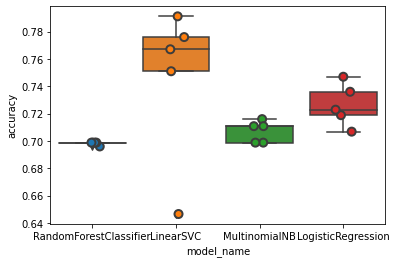

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
models = [
    RandomForestClassifier(n_estimators=100, max_depth=8, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])
import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [60]:
svc = LinearSVC()
svc.fit(X_train,y_train)
svc.score(X_test, y_test)

0.748

In [61]:
print(svc.predict(tfidf.transform(["bad"]))[0])
print(svc.predict(tfidf.transform(["good"]))[0])
print(svc.predict(tfidf.transform(["alright"]))[0])

negative
positive
neutral


In [25]:
#Keras bidirectional LSTM


In [27]:
from keras.preprocessing.text import Tokenizer

# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 20000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 500
# This is fixed.
EMBEDDING_DIM = 100

tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(df['review_combined'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 8974 unique tokens.


In [28]:
from keras.preprocessing.sequence import pad_sequences
X = tokenizer.texts_to_sequences(df['review_combined'].values)
X = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X.shape)

Shape of data tensor: (1246, 500)


In [29]:
Y = pd.get_dummies(df["sentiment_labels"]).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 0)


In [34]:
embeddings_index = {}
f = open('glove.6B.100d.txt', encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

print('Found %s word vectors.' %len(embeddings_index))


Found 400000 word vectors.


In [35]:
max_features = 20000
num_words = min(max_features, len(word_index)) + 1
print(num_words)

embedding_dim = 100

# first create a matrix of zeros, this is our embedding matrix
embedding_matrix = np.zeros((num_words, embedding_dim))

# for each word in out tokenizer lets try to find that work in our w2v model
for word, i in word_index.items():
    if i > max_features:
        continue
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # we found the word - add that words vector to the matrix
        embedding_matrix[i] = embedding_vector
    else:
        # doesn't exist, assign a random vector
        embedding_matrix[i] = np.random.randn(embedding_dim)

8975


In [36]:
import keras
from keras.layers import Embedding, LSTM, Dense, SpatialDropout1D, Reshape, Bidirectional
from keras.callbacks import EarlyStopping
from keras.initializers import Constant

import tensorflow_hub as hub
import tensorflow as tf

sequence_length=500
model = keras.Sequential()
model.add(Embedding(num_words,
                    embedding_dim,
                    embeddings_initializer=Constant(embedding_matrix),
                    input_length=sequence_length,
                    trainable=True))
model.add(SpatialDropout1D(0.2))
model.add( Bidirectional( LSTM(50, dropout = 0.2, recurrent_dropout = 0.2)))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])



epochs = 10
batch_size = 32



In [37]:
history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/10
28/28 [==============================] - 32s 1s/step - loss: 0.9922 - accuracy: 0.5614 - val_loss: 0.9098 - val_accuracy: 0.6444
Epoch 2/10
28/28 [==============================] - 30s 1s/step - loss: 0.9542 - accuracy: 0.5681 - val_loss: 0.9053 - val_accuracy: 0.6444
Epoch 3/10
28/28 [==============================] - 32s 1s/step - loss: 0.9314 - accuracy: 0.5770 - val_loss: 0.8779 - val_accuracy: 0.6444
Epoch 4/10
28/28 [==============================] - 31s 1s/step - loss: 0.8886 - accuracy: 0.6038 - val_loss: 0.8270 - val_accuracy: 0.6578
Epoch 5/10
28/28 [==============================] - 32s 1s/step - loss: 0.8290 - accuracy: 0.6339 - val_loss: 0.7632 - val_accuracy: 0.6800
Epoch 6/10
28/28 [==============================] - 32s 1s/step - loss: 0.7175 - accuracy: 0.6987 - val_loss: 0.7426 - val_accuracy: 0.6578
Epoch 7/10
28/28 [==============================] - 32s 1s/step - loss: 0.6647 - accuracy: 0.7132 - val_loss: 0.6841 - val_accuracy: 0.7200
Epoch 8/10
28/28 [==

In [72]:
accr = model.evaluate(X_test,Y_test)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

4/4 [==============================] - 0s 90ms/step - loss: 0.5308 - accuracy: 0.7760
Test set
  Loss: 0.531
  Accuracy: 0.776


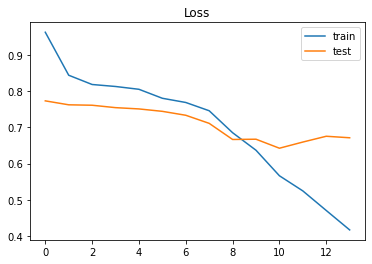

In [73]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

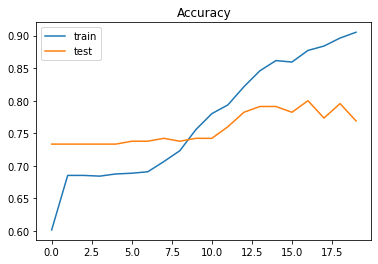

In [64]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [47]:
new_complaint = ['it was good']
seq = tokenizer.texts_to_sequences(new_complaint)
padded = pad_sequences(seq, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(padded)
labels = ['negative','neutral','positive']
print(pred, labels[np.argmax(pred)])

[[0.16252945 0.1252015  0.71226907]] positive
